<h1 align='center'>Đỗ Trọng Khánh - 19521676</h1>

<h1 align='center'>Cassification Social Network Ads</h1>

- Bước 1: Đọc dữ liệu từ file .csv
- Bước 2: Phân chia dữ liệu thành tập train và tập test theo tỉ lệ 8:2
- Bước 3: Chuẩn hóa dữ liệu
- Bước 4: Khởi tạo và huấn luyện các mô hình
- Bước 5: Infer và đánh giá mô hình với độ đo accuracy
- Bước 6: Trực quan hóa kết quả của mô hình vừa huấn luyện

# Connect Driver

In [78]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Import Libary

In [79]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Prepare Data

In [80]:
data_link = '/gdrive/MyDrive/Colab Notebooks/Lập trình Python cho Máy học/Week 6/Social_Network_Ads.csv'
data = pd.read_csv(data_link)

In [81]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [82]:
df = pd.DataFrame(data)
X_data = df.iloc[:, 0:-1];
Y_data = df.iloc[:, -1:];

In [83]:
X_data

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


# Chuẩn hoá dữ liệu với StandardScaler

In [84]:
X_data_np = X_data.to_numpy()
Y_data_np = Y_data.to_numpy()
std_X_np = StandardScaler().fit_transform(X_data_np)
std_X_df = pd.DataFrame(std_X_np)
std_X_df.head()

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


# Split data

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(std_X_np, Y_data_np, test_size=0.2)

# Visualize results model

In [86]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def visualize_results(X_test, Y_test, model, title):
  x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
  y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
  h = 0.02
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(1, figsize=(6,6))
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
  plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(title)
  plt.show()

# Đánh model giá bằng K-Fold Cross Validation

In [87]:
from sklearn.model_selection import KFold
def evaluate_with_KFold(X_data_np, Y_data_np, model):
    kfold = KFold(5, True, 1);
    accuracy_list = [];
    for train, test in kfold.split(X_data_np, Y_data_np):
        X_train, X_test = X_data_np[train], X_data_np[test];
        Y_train, Y_test = Y_data_np[train], Y_data_np[test]

        model.fit(X_train, Y_train);
        Y_pred = model.predict(X_test);
        accuracy_list.append(accuracy_score(Y_test, Y_pred));

    return np.mean(accuracy_list);

# Tranning and evaluate model

## Model Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
Y_pred = logistic_regression_model.predict(X_test)

In [90]:
accuracy = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print('Accuracy: ', accuracy)
print('--------------------------------------------')
print('Accuracy with K-Fold: ',evaluate_with_KFold(std_X_np, Y_data_np, logistic_regression_model));

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        57
           1       0.70      0.61      0.65        23

    accuracy                           0.81        80
   macro avg       0.77      0.75      0.76        80
weighted avg       0.81      0.81      0.81        80

Accuracy:  0.8125
--------------------------------------------
Accuracy with K-Fold:  0.8450000000000001


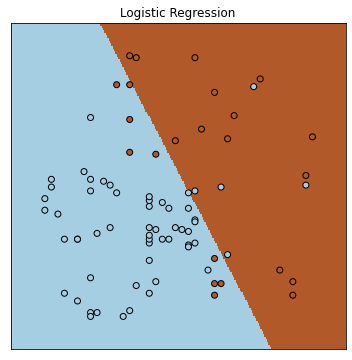

In [91]:
visualize_results(X_test, Y_test, logistic_regression_model, 'Logistic Regression')

## Model KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=7)

In [93]:
KNN_model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [94]:
Y_pred = KNN_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print('Accuracy: ', accuracy)
print('--------------------------------------------')
print('Accuracy with K-Fold: ',evaluate_with_KFold(std_X_np, Y_data_np, KNN_model));

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        57
           1       0.78      0.91      0.84        23

    accuracy                           0.90        80
   macro avg       0.87      0.90      0.88        80
weighted avg       0.91      0.90      0.90        80

Accuracy:  0.9
--------------------------------------------
Accuracy with K-Fold:  0.9075000000000001


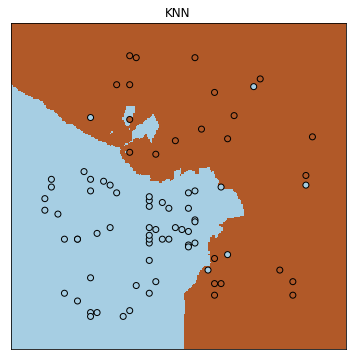

In [95]:
visualize_results(X_test, Y_test, KNN_model, 'KNN')

## Model Support Vector Machine(SVM)

In [96]:
# SVM rbf
from sklearn.svm import SVC
svm_model = SVC(C=1, kernel='rbf', gamma=0.01)

In [97]:
svm_model.fit(X_train, Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
Y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print('Accuracy: ', accuracy)
print('--------------------------------------------')
print('Accuracy with K-Fold: ',evaluate_with_KFold(std_X_np, Y_data_np, svm_model));

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        57
           1       0.80      0.52      0.63        23

    accuracy                           0.82        80
   macro avg       0.82      0.73      0.76        80
weighted avg       0.82      0.82      0.81        80

Accuracy:  0.825
--------------------------------------------
Accuracy with K-Fold:  0.8175000000000001


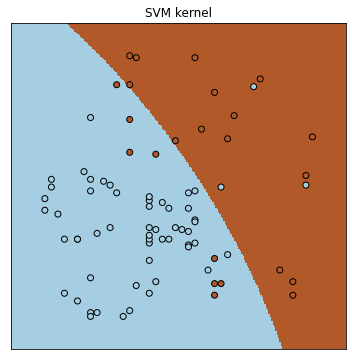

In [99]:
visualize_results(X_test, Y_test, svm_model, 'SVM kernel')

In [100]:
# SVM linear
svm_model = SVC(C=1, kernel='linear', gamma=0.01)

In [101]:
svm_model.fit(X_train, Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [102]:
Y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print('Accuracy: ', accuracy)
print('--------------------------------------------')
print('Accuracy with K-Fold: ',evaluate_with_KFold(std_X_np, Y_data_np, svm_model));

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        57
           1       0.70      0.61      0.65        23

    accuracy                           0.81        80
   macro avg       0.77      0.75      0.76        80
weighted avg       0.81      0.81      0.81        80

Accuracy:  0.8125
--------------------------------------------
Accuracy with K-Fold:  0.8425


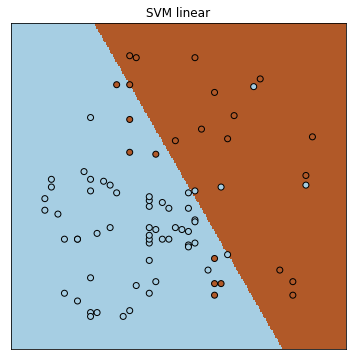

In [103]:
visualize_results(X_test, Y_test, svm_model, 'SVM linear')

## Model Naive bayes

In [104]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()

In [105]:
naive_bayes_model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [106]:
Y_pred = naive_bayes_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print('Accuracy: ', accuracy)
print('--------------------------------------------')
print('Accuracy with K-Fold: ',evaluate_with_KFold(std_X_np, Y_data_np, naive_bayes_model));

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        57
           1       0.83      0.83      0.83        23

    accuracy                           0.90        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.90      0.90      0.90        80

Accuracy:  0.9
--------------------------------------------
Accuracy with K-Fold:  0.8899999999999999


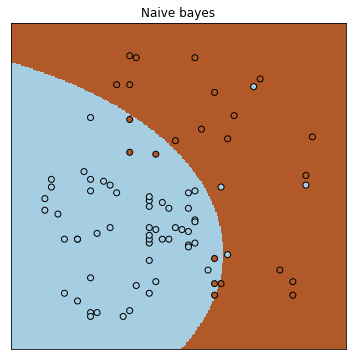

In [107]:
visualize_results(X_test, Y_test, naive_bayes_model, 'Naive bayes')

## Model Decision Tree

In [108]:
from sklearn import tree
clf_model = tree.DecisionTreeClassifier()

In [109]:
clf_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [110]:
Y_pred = clf_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print('Accuracy: ', accuracy)
print('--------------------------------------------')
print('Accuracy with K-Fold: ',evaluate_with_KFold(std_X_np, Y_data_np, clf_model));

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        57
           1       0.75      0.91      0.82        23

    accuracy                           0.89        80
   macro avg       0.86      0.90      0.87        80
weighted avg       0.90      0.89      0.89        80

Accuracy:  0.8875
--------------------------------------------
Accuracy with K-Fold:  0.8400000000000001


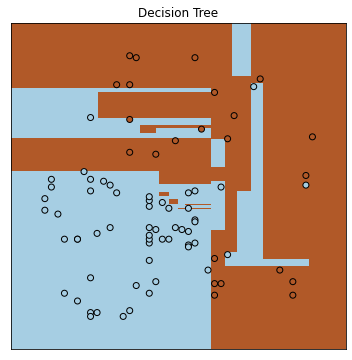

In [111]:
visualize_results(X_test, Y_test, clf_model, 'Decision Tree')

## Model Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(max_depth=2, random_state=0)

In [113]:
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [114]:
Y_pred = rfc_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(classification_report(Y_test, Y_pred))
print('Accuracy: ', accuracy)
print('--------------------------------------------')
print('Accuracy with K-Fold: ',evaluate_with_KFold(std_X_np, Y_data_np, rfc_model));

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        57
           1       0.79      1.00      0.88        23

    accuracy                           0.93        80
   macro avg       0.90      0.95      0.91        80
weighted avg       0.94      0.93      0.93        80

Accuracy:  0.925
--------------------------------------------
Accuracy with K-Fold:  0.9125


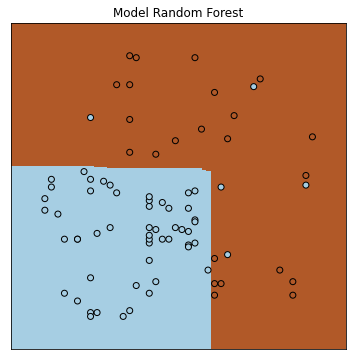

In [115]:
visualize_results(X_test, Y_test, rfc_model, 'Model Random Forest')